In [17]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('grocery_sales.csv')

In [3]:
df

,Date,Item,Category,Quantity,Unit_Price,Total_Sale,Payment_Method
0,2025-07-01,Bread,Bakery,12,30,360,Cash
1,2025-07-02,Cookies,Bakery,5,20,100,UPI
2,2025-07-03,Orange,Fruits,19,25,475,Cash
3,2025-07-04,Orange,Fruits,9,25,225,Cash
4,2025-07-05,Banana,Fruits,18,10,180,UPI
...,...,...,...,...,...,...,...
95,2025-10-04,Orange,Fruits,1,25,25,UPI
96,2025-10-05,Cake,Bakery,19,150,2850,UPI
97,2025-10-06,Grapes,Fruits,18,18,324,UPI
98,2025-10-07,Milk,Dairy,1,45,45,Card


In [5]:
df.shape # Checking the number of rows and columns

(100, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            100 non-null    object
 1   Item            100 non-null    object
 2   Category        100 non-null    object
 3   Quantity        100 non-null    int64 
 4   Unit_Price      100 non-null    int64 
 5   Total_Sale      100 non-null    int64 
 6   Payment_Method  100 non-null    object
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


# Checking missing values in columns

In [10]:
df.isnull().sum()

Date              0
Item              0
Category          0
Quantity          0
Unit_Price        0
Total_Sale        0
Payment_Method    0
dtype: int64

In [12]:
df.describe()

,Quantity,Unit_Price,Total_Sale
count,100.000000,100.000000,100.000000
mean,10.380000,43.660000,427.720000
std,5.674291,37.054756,486.395484
min,1.000000,6.000000,10.000000
25%,6.000000,20.000000,157.500000
50%,10.000000,25.000000,300.000000
75%,15.000000,60.000000,480.000000
max,20.000000,150.000000,2850.000000


# Total Sales per day

In [16]:
total_sales_per_day = df[['Date','Total_Sale']]
total_sales_per_day

,Date,Total_Sale
0,2025-07-01,360
1,2025-07-02,100
2,2025-07-03,475
3,2025-07-04,225
4,2025-07-05,180
...,...,...
95,2025-10-04,25
96,2025-10-05,2850
97,2025-10-06,324
98,2025-10-07,45


In [20]:
highest_day_sale = np.max(total_sales_per_day['Total_Sale'])
highest_day_sale

2850

# Line graph of total sale over time

In [24]:
import matplotlib.pyplot as plt

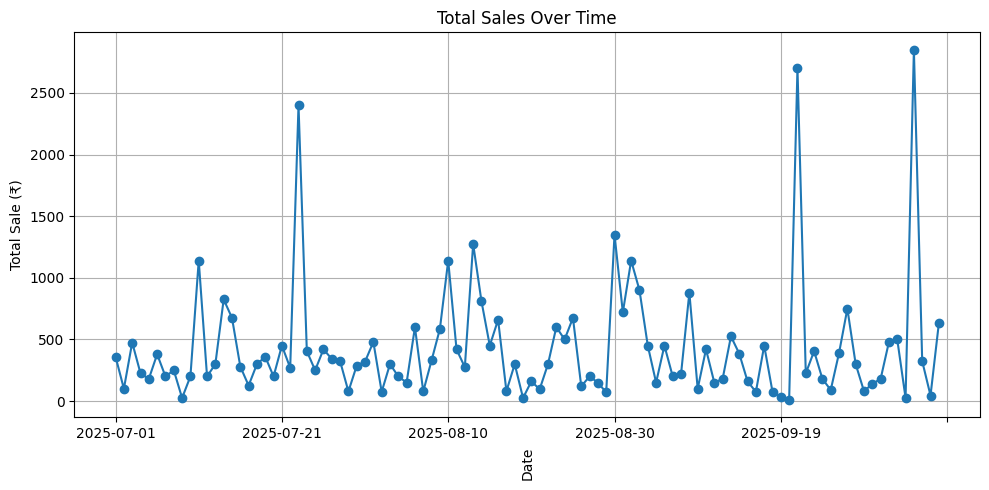

In [49]:
plt.figure(figsize=(10, 5))
daily_sales.plot(marker='o')
plt.title("Total Sales Over Time")
plt.xlabel("Date",rotation='vertical')
plt.ylabel("Total Sale (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
df.head()

,Date,Item,Category,Quantity,Unit_Price,Total_Sale,Payment_Method
0,2025-07-01,Bread,Bakery,12,30,360,Cash
1,2025-07-02,Cookies,Bakery,5,20,100,UPI
2,2025-07-03,Orange,Fruits,19,25,475,Cash
3,2025-07-04,Orange,Fruits,9,25,225,Cash
4,2025-07-05,Banana,Fruits,18,10,180,UPI


# Total quantity sold by category

In [32]:
# total_quantity_sold_by_category = df[['Category','Quantity']]
# total_quantity_sold_by_category

print(df.groupby("Category")["Quantity"].sum())

Category
Bakery    232
Dairy     415
Fruits    391
Name: Quantity, dtype: int64


# Total sale by category

In [33]:
print(df.groupby("Category")['Total_Sale'].sum())

Category
Bakery    15630
Dairy     19942
Fruits     7200
Name: Total_Sale, dtype: int64


# Top 5 best-selling items (by quantity)

In [34]:
print(df.groupby("Item")["Quantity"].sum().sort_values(ascending=False).head())

Item
Orange    112
Bread     111
Banana    102
Milk      100
Cheese     99
Name: Quantity, dtype: int64


# Top 5 revenue-generating items

In [35]:
print(df.groupby("Item")["Total_Sale"].sum().sort_values(ascending=False).head())

Item
Cake      11400
Cheese     5940
Paneer     4875
Milk       4500
Bread      3330
Name: Total_Sale, dtype: int64


# Average unit price by category

In [38]:
print(df.groupby("Category")['Unit_Price'].mean())

Category
Bakery    70.909091
Dairy     49.045455
Fruits    19.058824
Name: Unit_Price, dtype: float64


# Item with highest unit price

# Revenue per unit by category

In [40]:
df.groupby("Category")["Total_Sale"].sum()

Category
Bakery    15630
Dairy     19942
Fruits     7200
Name: Total_Sale, dtype: int64

In [41]:
df.groupby("Category")["Quantity"].sum()

Category
Bakery    232
Dairy     415
Fruits    391
Name: Quantity, dtype: int64

In [39]:
revenue_per_unit = df.groupby("Category")["Total_Sale"].sum() / df.groupby("Category")["Quantity"].sum()
print(revenue_per_unit)

Category
Bakery    67.370690
Dairy     48.053012
Fruits    18.414322
dtype: float64


# Category wise sales per day

In [43]:
df.groupby('Date')['Category'].sum()

Date
2025-07-01    Bakery
2025-07-02    Bakery
2025-07-03    Fruits
2025-07-04    Fruits
2025-07-05    Fruits
               ...  
2025-10-04    Fruits
2025-10-05    Bakery
2025-10-06    Fruits
2025-10-07     Dairy
2025-10-08     Dairy
Name: Category, Length: 100, dtype: object

# Total sales by each payment method

In [45]:
df.groupby('Payment_Method')['Total_Sale'].sum()

Payment_Method
Card    14824
Cash    13849
UPI     14099
Name: Total_Sale, dtype: int64

# Popular payment method

In [56]:
print("\nMost used payment method:", df["Payment_Method"].value_counts().idxmax())


Most used payment method: Card


# Sales distribution by category.

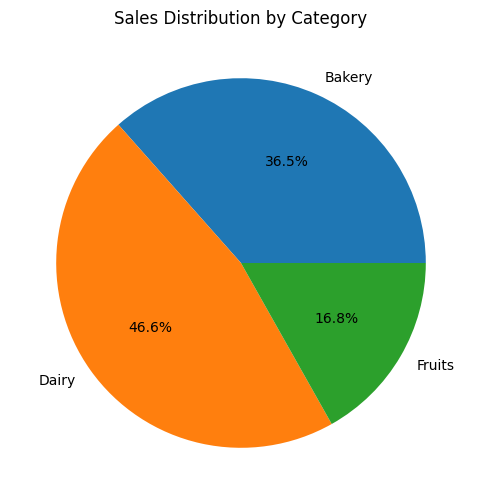

In [58]:
# Pie chart: Sales by category
df.groupby("Category")["Total_Sale"].sum().plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6))
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()

# Distribution of quantity sold

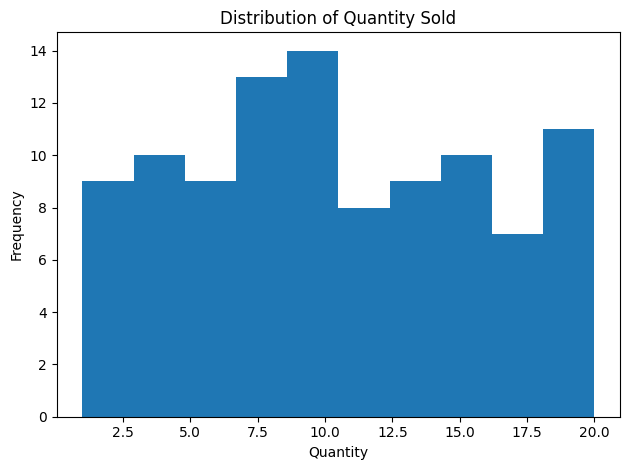

In [62]:
df["Quantity"].plot(kind="hist", bins=10, title="Distribution of Quantity Sold")
plt.xlabel("Quantity")
plt.tight_layout()
plt.show()

# Adding new column as Revenue_per_unit

In [63]:
df['Revenue_per_unit'] = df.Total_Sale / df.Quantity

In [66]:
df

,Date,Item,Category,Quantity,Unit_Price,Total_Sale,Payment_Method,Revenue_per_unit
0,2025-07-01,Bread,Bakery,12,30,360,Cash,30.0
1,2025-07-02,Cookies,Bakery,5,20,100,UPI,20.0
2,2025-07-03,Orange,Fruits,19,25,475,Cash,25.0
3,2025-07-04,Orange,Fruits,9,25,225,Cash,25.0
4,2025-07-05,Banana,Fruits,18,10,180,UPI,10.0
...,...,...,...,...,...,...,...,...
95,2025-10-04,Orange,Fruits,1,25,25,UPI,25.0
96,2025-10-05,Cake,Bakery,19,150,2850,UPI,150.0
97,2025-10-06,Grapes,Fruits,18,18,324,UPI,18.0
98,2025-10-07,Milk,Dairy,1,45,45,Card,45.0


# Identify items with Revenue_per_unit > 50

In [67]:
print(df[df["Revenue_per_unit"] > 50][["Date", "Item", "Revenue_per_unit"]].head())

          Date    Item  Revenue_per_unit
10  2025-07-11  Cheese              60.0
13  2025-07-14  Butter              55.0
20  2025-07-21  Paneer              75.0
22  2025-07-23    Cake             150.0
31  2025-08-01  Cheese              60.0
